[4.3  4.66 5.02 5.38 5.74 6.1  6.46 6.82 7.18 7.54 7.9 ]


C:\Users\shuoyan001\.julia\packages\Conda\m7vem\deps\usr\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


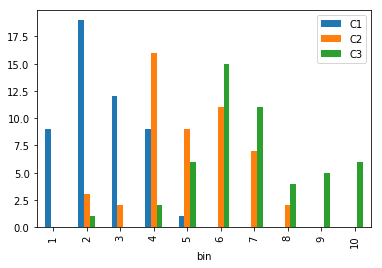

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv('iris.csv')
data.rename(columns={'SL':'SL','Flower Class (1.0 – Setosa, 2.0 – Versicolor, 3.0 – Virginica)':'class'},inplace=True)

max_sl=data['SL'].max()

min_sl=data['SL'].min()

bins=np.linspace(min_sl,max_sl,11)
print (bins)
data['bin']=0
data['bin'].loc[data['SL']==7.9]=10

for i in range(10):
    data['bin'].loc[(data['SL']>=bins[i])&(data['SL']<bins[i+1])]=i+1

a=(data['bin'].loc[data['class']==1].value_counts().sort_index()).to_frame()
a.index.name='bin'
a.columns=['C1']
b=(data['bin'].loc[data['class']==2].value_counts().sort_index()).to_frame()
b.index.name='bin'
b.columns=['C2']
c=(data['bin'].loc[data['class']==3].value_counts().sort_index()).to_frame()
c.index.name='bin'
c.columns=['C3']
pd.concat([a,b,c],axis=1).plot.bar()

In [2]:
combine=pd.concat([a,b,c],axis=1).fillna(0)
combine

,C1,C2,C3
bin,,,
1,9.0,0.0,0.0
2,19.0,3.0,1.0
3,12.0,2.0,0.0
4,9.0,16.0,2.0
5,1.0,9.0,6.0
6,0.0,11.0,15.0
7,0.0,7.0,11.0
8,0.0,2.0,4.0
9,0.0,0.0,5.0


# Even bins

In [3]:
combine.loc[[2]+[4]+[6]+[8]+[10]]

,C1,C2,C3
bin,,,
2,19.0,3.0,1.0
4,9.0,16.0,2.0
6,0.0,11.0,15.0
8,0.0,2.0,4.0
10,0.0,0.0,6.0


# Odd bins

In [4]:
combine.loc[[1]+[3]+[5]+[7]+[9]]

,C1,C2,C3
bin,,,
1,9.0,0.0,0.0
3,12.0,2.0,0.0
5,1.0,9.0,6.0
7,0.0,7.0,11.0
9,0.0,0.0,5.0


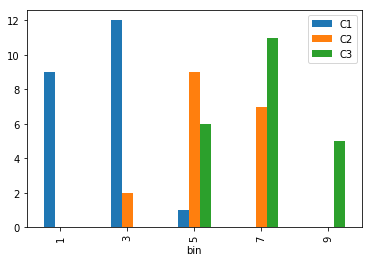

In [5]:
combine.loc[[1]+[3]+[5]+[7]+[9]].plot.bar()